<a href="https://colab.research.google.com/github/Shiwaninayak/Linear-Regression-Assessment/blob/main/linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the medical price data into a data frame
df = pd.read_csv('/content/Medical Price Dataset.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [5]:
df = df.drop(['age', 'bmi'], axis=1)

In [6]:
len(df)

1338

In [7]:
len(df.columns)

5

In [8]:
df.dtypes

sex          object
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.isnull().values.sum()

0

In [10]:
target = df.iloc[:, 0].name
features = df.iloc[:, 1:].columns.tolist()
features

['children', 'smoker', 'region', 'charges']

<ipython-input-11-deef4314f6c1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

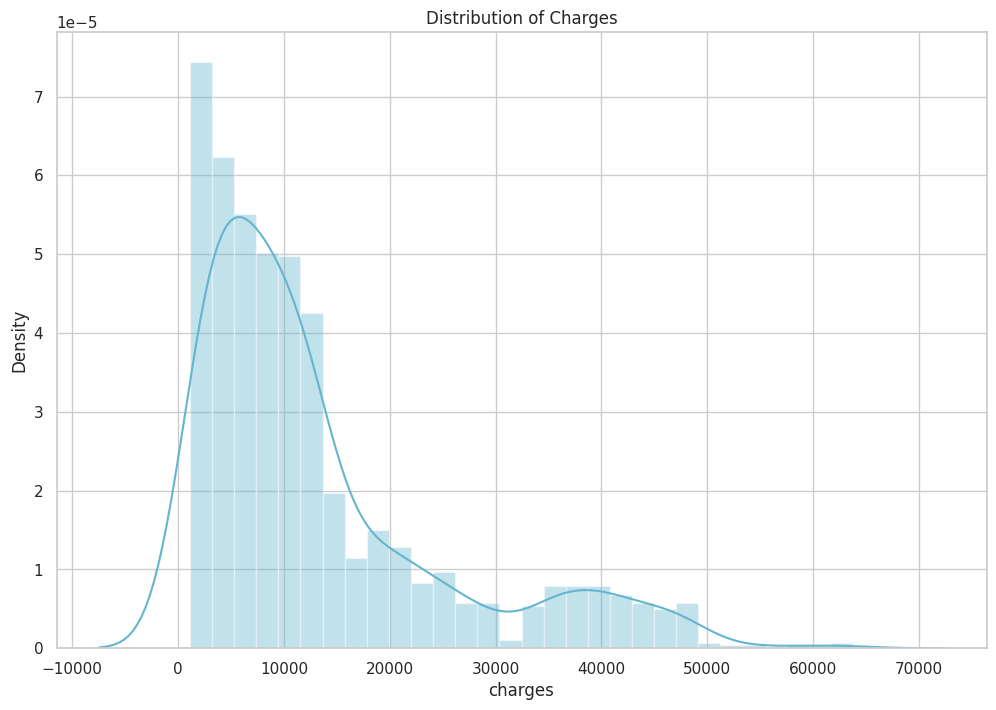

In [11]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

<ipython-input-12-82bc2b57840c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )


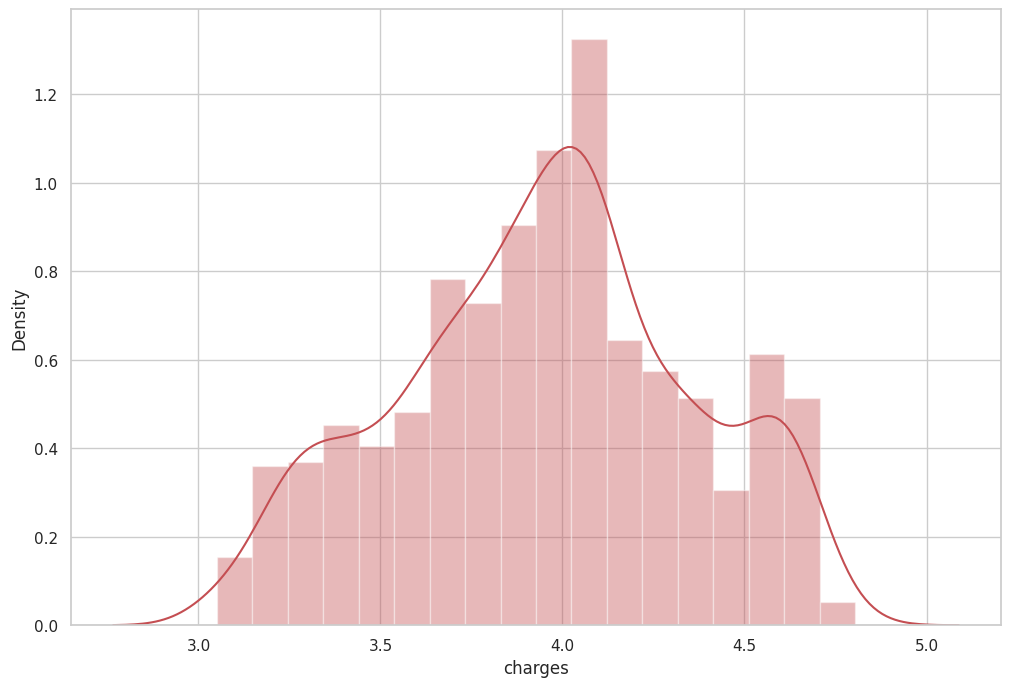

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

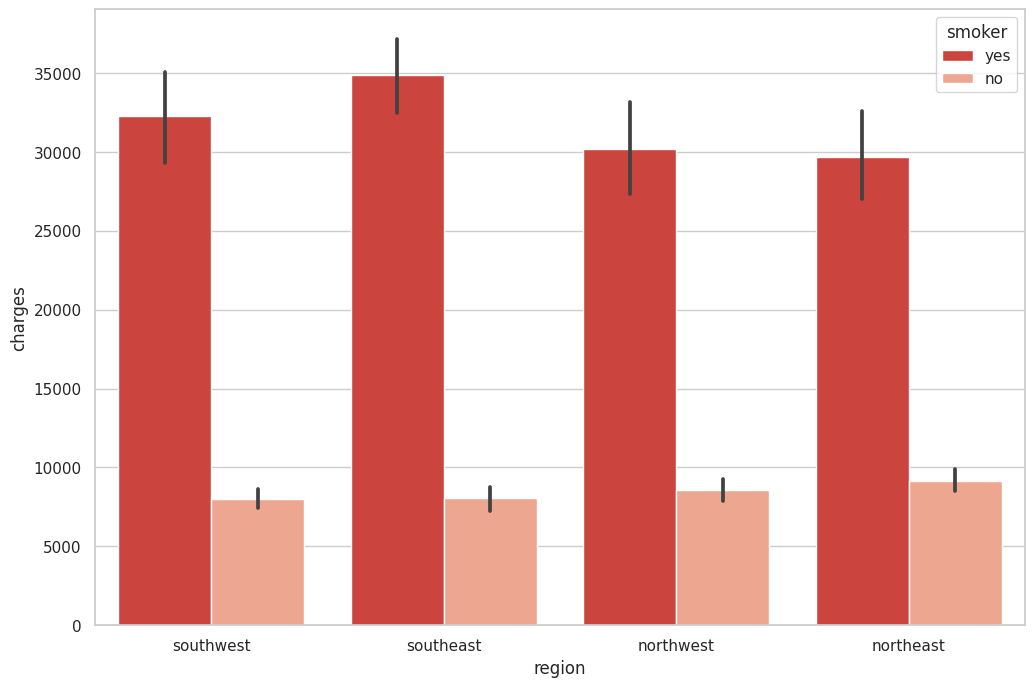

In [14]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

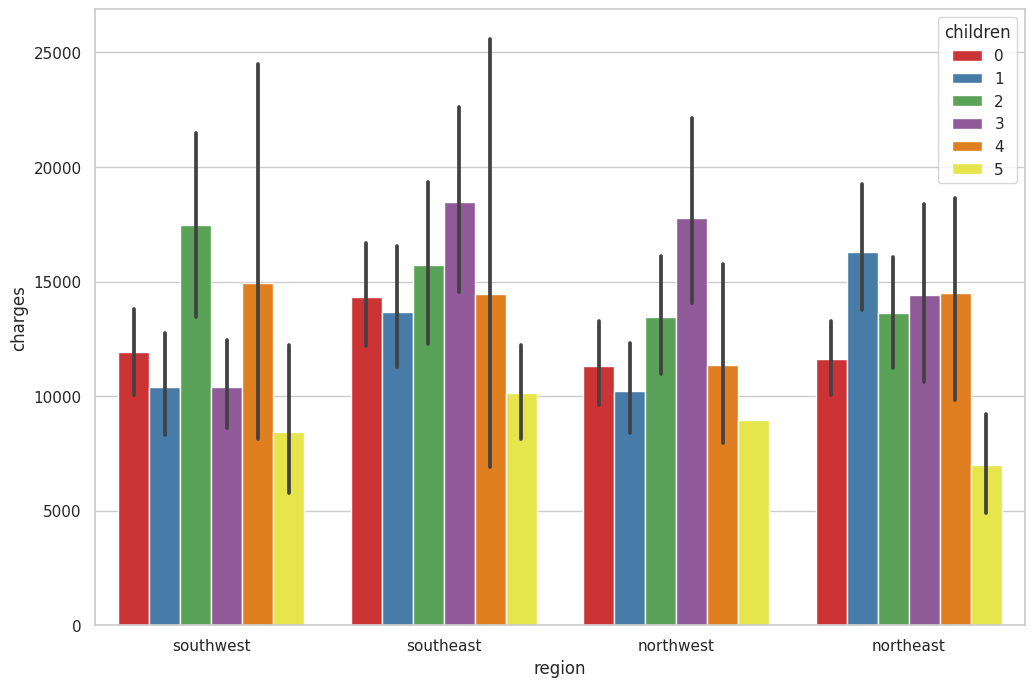

In [18]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

In [23]:
correlations = df.corr()
correlations['charges']

<ipython-input-23-3384b4659344>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [24]:
cor_target = abs(correlations['charges'])

# Display features with correlation < 0.2
removed_features = cor_target[cor_target < 0.2]
removed_features

children    0.067998
Name: charges, dtype: float64

In [25]:
df = df.drop(['sex', 'charges', 'smoker', 'region'], axis=1)

In [27]:
features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)
len_of_features

0

In [28]:
# Create X, y and theta
X = df.iloc[:, 1:]
ones = np.ones([len(df), 1])
X = np.concatenate((ones, X), axis=1)
y = df.iloc[:, 0:1].values
theta = np.zeros([1, len_of_features + 1])

In [29]:
# Store target
target = y

# Display the size of the matrices
X.shape, y.shape, theta.shape

((1338, 1), (1338, 1), (1, 1))

In [30]:
# Define computecost function
def computecost(X, y, theta):
    H = X @ theta.T
    J = np.power((H - y), 2)
    sum = np.sum(J)/(2 * len(X))
    return sum

In [31]:
alpha = 0.01
iterations = 500

In [32]:
# Define gradientdescent function
def gradientdescent(X, y, theta, iterations, alpha):
    cost = np.zeros(iterations)
    for i in range(iterations):
        H = X @ theta.T
        theta = theta - (alpha/len(X)) * np.sum(X * (H - y), axis=0)
        cost[i] = computecost(X, y, theta)
    return theta, cost

In [33]:
# Do Gradient Descent and display final theta
final_theta, cost = gradientdescent(X, y, theta, iterations, alpha)
final_theta

array([[1.08772365]])

In [34]:
final_cost = computecost(X, y, final_theta)
final_cost

0.7260891965593723

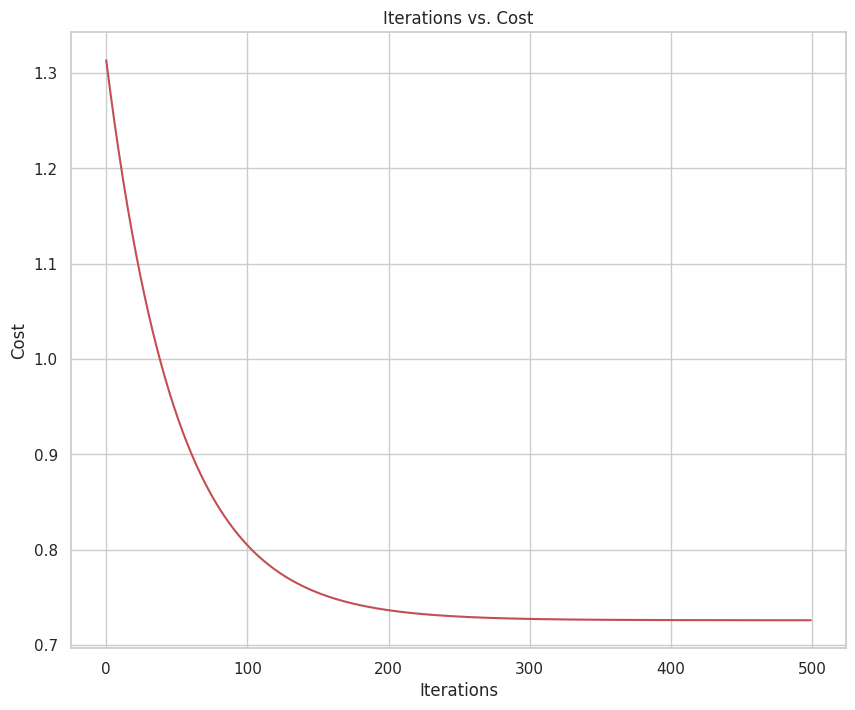

In [35]:
# Plot Iterations vs. Cost figure
fig_2, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Iterations vs. Cost')
plt.show()

In [36]:
def rmse(target, final_theta):
    predictions = X @ final_theta.T
    return np.sqrt(((predictions[:, 0] - target[:, 0]) ** 2).mean())

# Compute and display Root Mean Squared Error
rmse_val = rmse(target, final_theta)
rmse_val

1.2050636469161058

In [37]:
# Display sample prediction for first observation
predictions = X @ final_theta.T
str(predictions[0])

'[1.08772365]'